In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd
import seaborn as sns
import unicodedata
import os
import math
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import bokeh
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # this could be any ML method
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt
import kagglehub
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [4]:
df = pd.read_csv('US_Stock_Data_vs.csv')
df_tweet = pd.read_csv('stock_tweets.csv')
df.head()

Unnamed: 0        Date  Natural_Gas_Price  Natural_Gas_Vol.  \
0           0    2/2/2024              2.079               NaN   
1           1    1/2/2024              2.050          161340.0   
2           2  31-01-2024              2.100          142860.0   
3           3  30-01-2024              2.077          139750.0   
4           4  29-01-2024              2.490            3590.0   

   Crude_oil_Price  Crude_oil_Vol.  Copper_Price  Copper_Vol. Bitcoin_Price  \
0            72.28             NaN        3.8215          NaN     43,194.70   
1            73.82        577940.0        3.8535          NaN     43,081.40   
2            75.85        344490.0        3.9060          NaN     42,580.50   
3            77.82        347240.0        3.9110          NaN     42,946.20   
4            76.78        331930.0        3.8790          NaN     43,299.80   

   Bitcoin_Vol.  ... Berkshire_Price  Berkshire_Vol. Netflix_Price  \
0         42650  ...        5,89,498           10580        564.64   
1         47690  ...        5,81,600            9780        567.51   
2         56480  ...        5,78,020            9720        564.11   
3         55130  ...        5,84,680            9750        562.85   
4         45230  ...        5,78,800           13850        575.79   

   Netflix_Vol. Amazon_Price Amazon_Vol.  Meta_Price  Meta_Vol.  Gold_Price  \
0       4030000       171.81   117220000      474.99   84710000    2,053.70   
1       3150000       159.28    66360000      394.78   25140000    2,071.10   
2       4830000       155.20    49690000      390.14   20010000    2,067.40   
3       6120000       159.00    42290000      400.06   18610000    2,050.90   
4       6880000       161.26    42840000      401.02   17790000    2,034.90   

   Gold_Vol.  
0        NaN  
1   260920.0  
2   238370.0  
3   214590.0  
4     1780.0  

[5 rows x 39 columns]

In [5]:
df_tweet.isna().sum()

Date            0
Tweet           0
Stock Name      0
Company Name    0
dtype: int64

In [9]:
df.describe()

Unnamed: 0  Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  \
count  1013.000000        1013.000000       1009.000000      1013.000000   
mean    506.000000           3.726667     129091.932607        69.853475   
std     292.572213           1.943030      64035.426727        21.986697   
min       0.000000           1.482000       1200.000000       -37.630000   
25%     253.000000           2.447000      88680.000000        54.760000   
50%     506.000000           2.880000     125980.000000        72.910000   
75%     759.000000           4.805000     164810.000000        82.810000   
max    1012.000000           9.647000     381970.000000       123.700000   

       Crude_oil_Vol.  Copper_Price    Copper_Vol.  Bitcoin_Vol.  \
count    9.900000e+02   1013.000000     976.000000  1.013000e+03   
mean     3.571739e+05      3.726843   37606.752049  4.924137e+07   
std      1.864309e+05      0.646524   39192.315092  3.251389e+08   
min      1.702000e+04      2.100500      10.000000  2.600000e+02   
25%      2.751800e+05      3.408000     380.000000  7.142000e+04   
50%      3.450350e+05      3.800500   31635.000000  1.288800e+05   
75%      4.269225e+05      4.251500   70982.500000  3.860000e+05   
max      1.770000e+06      4.937500  176040.000000  4.470000e+09   

       Platinum_Vol.  Ethereum_Vol.  ...  Nvidia_Price   Nvidia_Vol.  \
count     636.000000   1.013000e+03  ...   1013.000000  1.013000e+03   
mean     9082.515723   1.958002e+07  ...    219.738065  4.629821e+07   
std      8876.538587   1.469409e+08  ...    128.668703  1.878815e+07   
min         0.000000   7.518000e+04  ...     49.100000  9.790000e+06   
25%      1120.000000   5.272300e+05  ...    131.980000  3.348000e+07   
50%      6070.000000   9.665800e+05  ...    179.130000  4.368000e+07   
75%     15287.500000   3.670000e+06  ...    272.470000  5.640000e+07   
max     42830.000000   1.790000e+09  ...    661.600000  1.534600e+08   

       Berkshire_Vol.  Netflix_Price  Netflix_Vol.  Amazon_Price  \
count     1013.000000    1013.000000  1.013000e+03   1013.000000   
mean      2918.400790     422.035479  7.012043e+06    137.426209   
std       2715.637488     119.765870  6.788094e+06     27.321896   
min        120.000000     166.370000  1.140000e+06     81.820000   
25%        760.000000     338.630000  3.780000e+06    114.770000   
50%       2040.000000     431.600000  5.380000e+06    142.300000   
75%       4090.000000     509.640000  7.890000e+06    161.060000   
max      13850.000000     691.690000  1.333900e+08    186.570000   

        Amazon_Vol.   Meta_Price     Meta_Vol.      Gold_Vol.  
count  1.013000e+03  1013.000000  1.013000e+03    1011.000000  
mean   7.452566e+07   252.151046  2.504895e+07  189442.393670  
std    3.376809e+07    72.949246  1.635122e+07  104007.872337  
min    2.162000e+07    88.910000  5.470000e+06       0.000000  
25%    5.192000e+07   195.210000  1.612000e+07  142985.000000  
50%    6.515000e+07   262.010000  2.107000e+07  181200.000000  
75%    8.683000e+07   313.190000  2.903000e+07  231500.000000  
max    3.113500e+08   474.990000  2.304100e+08  813410.000000  

[8 rows x 31 columns]

### Data cleaning

In [12]:
df["Date"] = df["Date"].str.replace('/', '-')
df["Date"] = pd.to_datetime(df["Date"], format='%d-%m-%Y')
df=df.set_index(df['Date'])
df.drop(columns=['Unnamed: 0','Date'], inplace=True)
df.head()

Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  \
Date                                                               
2024-02-02              2.079               NaN            72.28   
2024-02-01              2.050          161340.0            73.82   
2024-01-31              2.100          142860.0            75.85   
2024-01-30              2.077          139750.0            77.82   
2024-01-29              2.490            3590.0            76.78   

            Crude_oil_Vol.  Copper_Price  Copper_Vol. Bitcoin_Price  \
Date                                                                  
2024-02-02             NaN        3.8215          NaN     43,194.70   
2024-02-01        577940.0        3.8535          NaN     43,081.40   
2024-01-31        344490.0        3.9060          NaN     42,580.50   
2024-01-30        347240.0        3.9110          NaN     42,946.20   
2024-01-29        331930.0        3.8790          NaN     43,299.80   

            Bitcoin_Vol. Platinum_Price  Platinum_Vol.  ... Berkshire_Price  \
Date                                                    ...                   
2024-02-02         42650          901.6            NaN  ...        5,89,498   
2024-02-01         47690          922.3            NaN  ...        5,81,600   
2024-01-31         56480          932.6            NaN  ...        5,78,020   
2024-01-30         55130          931.7            NaN  ...        5,84,680   
2024-01-29         45230          938.3            NaN  ...        5,78,800   

            Berkshire_Vol. Netflix_Price Netflix_Vol.  Amazon_Price  \
Date                                                                  
2024-02-02           10580        564.64      4030000        171.81   
2024-02-01            9780        567.51      3150000        159.28   
2024-01-31            9720        564.11      4830000        155.20   
2024-01-30            9750        562.85      6120000        159.00   
2024-01-29           13850        575.79      6880000        161.26   

            Amazon_Vol.  Meta_Price  Meta_Vol.  Gold_Price  Gold_Vol.  
Date                                                                   
2024-02-02    117220000      474.99   84710000    2,053.70        NaN  
2024-02-01     66360000      394.78   25140000    2,071.10   260920.0  
2024-01-31     49690000      390.14   20010000    2,067.40   238370.0  
2024-01-30     42290000      400.06   18610000    2,050.90   214590.0  
2024-01-29     42840000      401.02   17790000    2,034.90     1780.0  

[5 rows x 37 columns]

In [14]:
df

Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  \
Date                                                               
2024-02-02              2.079               NaN            72.28   
2024-02-01              2.050          161340.0            73.82   
2024-01-31              2.100          142860.0            75.85   
2024-01-30              2.077          139750.0            77.82   
2024-01-29              2.490            3590.0            76.78   
...                       ...               ...              ...   
2020-01-08              2.141          242560.0            59.61   
2020-01-07              2.162          163010.0            62.70   
2020-01-06              2.135          154680.0            63.27   
2020-01-03              2.130          144670.0            63.05   
2020-01-02              2.122          164570.0            61.18   

            Crude_oil_Vol.  Copper_Price  Copper_Vol. Bitcoin_Price  \
Date                                                                  
2024-02-02             NaN        3.8215          NaN     43,194.70   
2024-02-01        577940.0        3.8535          NaN     43,081.40   
2024-01-31        344490.0        3.9060          NaN     42,580.50   
2024-01-30        347240.0        3.9110          NaN     42,946.20   
2024-01-29        331930.0        3.8790          NaN     43,299.80   
...                    ...           ...          ...           ...   
2020-01-08       1210000.0        2.8120      77700.0      8,059.60   
2020-01-07        582650.0        2.7935      59470.0      8,155.70   
2020-01-06        724240.0        2.7900      59570.0      7,759.10   
2020-01-03        885860.0        2.7870      74750.0      7,343.10   
2020-01-02        486870.0        2.8250      72460.0      6,967.00   

            Bitcoin_Vol. Platinum_Price  Platinum_Vol.  ... Berkshire_Price  \
Date                                                    ...                   
2024-02-02         42650          901.6            NaN  ...        5,89,498   
2024-02-01         47690          922.3            NaN  ...        5,81,600   
2024-01-31         56480          932.6            NaN  ...        5,78,020   
2024-01-30         55130          931.7            NaN  ...        5,84,680   
2024-01-29         45230          938.3            NaN  ...        5,78,800   
...                  ...            ...            ...  ...             ...   
2020-01-08       1190000            961            NaN  ...        3,39,188   
2020-01-07       1010000         977.75            NaN  ...        3,38,901   
2020-01-06        786750         969.35            NaN  ...        3,40,210   
2020-01-03        936290         988.55            NaN  ...        3,39,155   
2020-01-02        632780          986.9            NaN  ...        3,42,261   

            Berkshire_Vol. Netflix_Price Netflix_Vol.  Amazon_Price  \
Date                                                                  
2024-02-02           10580        564.64      4030000        171.81   
2024-02-01            9780        567.51      3150000        159.28   
2024-01-31            9720        564.11      4830000        155.20   
2024-01-30            9750        562.85      6120000        159.00   
2024-01-29           13850        575.79      6880000        161.26   
...                    ...           ...          ...           ...   
2020-01-08             190        339.26      7110000         94.60   
2020-01-07             280        330.75      4740000         95.34   
2020-01-06             280        335.83      5670000         95.14   
2020-01-03             220        325.90      3800000         93.75   
2020-01-02             410        329.81      4350000         94.90   

            Amazon_Vol.  Meta_Price  Meta_Vol.  Gold_Price  Gold_Vol.  
Date                                                                   
2024-02-02    117220000      474.99   84710000    2,053.70        NaN  
2024-02-01     66360000      394.78

In [16]:
numerical_columns=df.select_dtypes(include='number')
list(set(df.columns) - set(numerical_columns))

['Gold_Price',
 'Berkshire_Price',
 'S&P_500_Price',
 'Nasdaq_100_Price',
 'Platinum_Price',
 'Bitcoin_Price',
 'Ethereum_Price']

In [18]:
df[list(set(df.columns) - set(numerical_columns))].columns

Index(['Gold_Price', 'Berkshire_Price', 'S&P_500_Price', 'Nasdaq_100_Price',
       'Platinum_Price', 'Bitcoin_Price', 'Ethereum_Price'],
      dtype='object')

In [20]:
for i in ['Gold_Price', 'Nasdaq_100_Price', 'Berkshire_Price', 'Platinum_Price',
          'S&P_500_Price', 'Ethereum_Price', 'Bitcoin_Price']:
    df[i] = df[i].str.replace(',', '')  # Remove commas
    df[i] = df[i].astype(float)         # Convert to float to preserve decimals

df  # Display the DataFrame



Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  \
Date                                                               
2024-02-02              2.079               NaN            72.28   
2024-02-01              2.050          161340.0            73.82   
2024-01-31              2.100          142860.0            75.85   
2024-01-30              2.077          139750.0            77.82   
2024-01-29              2.490            3590.0            76.78   
...                       ...               ...              ...   
2020-01-08              2.141          242560.0            59.61   
2020-01-07              2.162          163010.0            62.70   
2020-01-06              2.135          154680.0            63.27   
2020-01-03              2.130          144670.0            63.05   
2020-01-02              2.122          164570.0            61.18   

            Crude_oil_Vol.  Copper_Price  Copper_Vol.  Bitcoin_Price  \
Date                                                                   
2024-02-02             NaN        3.8215          NaN        43194.7   
2024-02-01        577940.0        3.8535          NaN        43081.4   
2024-01-31        344490.0        3.9060          NaN        42580.5   
2024-01-30        347240.0        3.9110          NaN        42946.2   
2024-01-29        331930.0        3.8790          NaN        43299.8   
...                    ...           ...          ...            ...   
2020-01-08       1210000.0        2.8120      77700.0         8059.6   
2020-01-07        582650.0        2.7935      59470.0         8155.7   
2020-01-06        724240.0        2.7900      59570.0         7759.1   
2020-01-03        885860.0        2.7870      74750.0         7343.1   
2020-01-02        486870.0        2.8250      72460.0         6967.0   

            Bitcoin_Vol.  Platinum_Price  Platinum_Vol.  ...  Berkshire_Price  \
Date                                                     ...                    
2024-02-02         42650          901.60            NaN  ...         589498.0   
2024-02-01         47690          922.30            NaN  ...         581600.0   
2024-01-31         56480          932.60            NaN  ...         578020.0   
2024-01-30         55130          931.70            NaN  ...         584680.0   
2024-01-29         45230          938.30            NaN  ...         578800.0   
...                  ...             ...            ...  ...              ...   
2020-01-08       1190000          961.00            NaN  ...         339188.0   
2020-01-07       1010000          977.75            NaN  ...         338901.0   
2020-01-06        786750          969.35            NaN  ...         340210.0   
2020-01-03        936290          988.55            NaN  ...         339155.0   
2020-01-02        632780          986.90            NaN  ...         342261.0   

            Berkshire_Vol.  Netflix_Price  Netflix_Vol.  Amazon_Price  \
Date                                                                    
2024-02-02           10580         564.64       4030000        171.81   
2024-02-01            9780         567.51       3150000        159.28   
2024-01-31            9720         564.11       4830000        155.20   
2024-01-30            9750         562.85       6120000        159.00   
2024-01-29           13850         575.79       6880000        161.26   
...                    ...            ...           ...           ...   
2020-01-08             190         339.26       7110000         94.60   
2020-01-07             280         330.75       4740000         95.34   
2020-01-06             280         335.83       5670000         95.14   
2020-01-03             220         325.90       3800000         93.75   
2020-01-02             410         329.81       4350000         94.90   

            Amazon_Vol.  Meta_Price  Meta_Vol.  Gold_Price  Gold_Vol.  
Date                                                                   
2024-02-02    117220000      474.99   8471

In [22]:
type(df.iloc[0]['Platinum_Price'])

numpy.float64

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
scaler = StandardScaler()
numerical_columns=df.select_dtypes(include='number').columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns)
    ])
transformed_data = preprocessor.fit_transform(df)
standardized_df = pd.DataFrame(transformed_data, columns=numerical_columns)
z=scaler.fit_transform(df.select_dtypes(include='number'))
transformed_columns = numerical_columns

#float_cols = z.select_dtypes(include=['float64']).columns
z= pd.DataFrame(z, columns=transformed_columns)
#df = z[z[float_cols].apply(lambda x: x.between(-3, 3)).any(axis=1)].dropna()

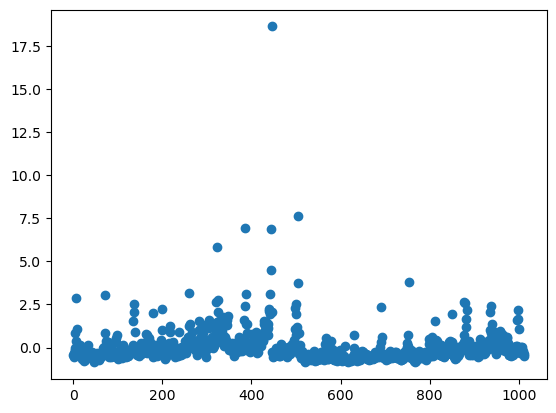

In [26]:
plt.scatter(x=z.index,y=z['Netflix_Vol.'])

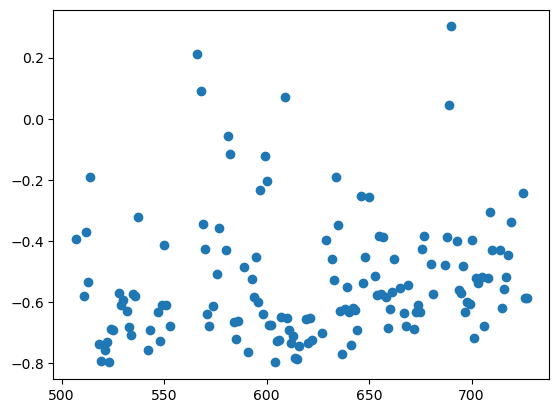

In [28]:
def remove_outliers(df, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile Range
        
        # Define the bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out the outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df
df_out=remove_outliers(z, numerical_columns)
plt.scatter(x=df_out.index,y=df_out['Netflix_Vol.'])

In [235]:
df_time = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]},
                       index=[pd.Timestamp('20130101 09:00:00'),
                              pd.Timestamp('20130101 09:00:02'),
                              pd.Timestamp('20130101 09:00:03'),
                              pd.Timestamp('20130101 09:00:05'),
                              pd.Timestamp('20130101 09:00:06')])
df_roll = df.rolling(30, win_type='gaussian').sum(std=3)

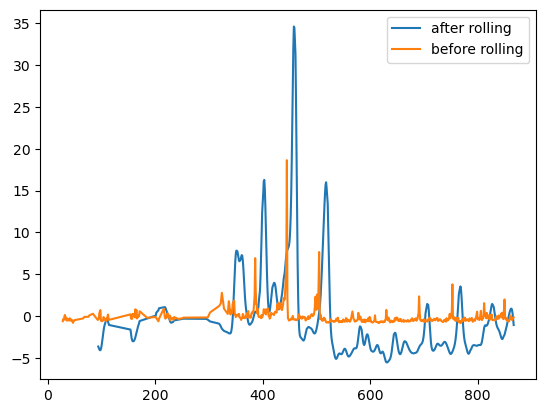

In [239]:
plt.plot(df.index, df_roll['Netflix_Vol.'], label='after rolling')
plt.plot(df.index, df['Netflix_Vol.'], label='before rolling')
plt.legend()

In [221]:
df

Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  Crude_oil_Vol.  \
28           -0.594555         -0.695928         0.183680       -0.564537   
29           -0.658919         -0.059870         0.198697       -0.449798   
30           -0.635748          0.646026         0.163203       -1.778951   
31           -0.630084          0.393853         0.119064       -1.520011   
32           -0.636263          0.939759         0.071739       -1.404253   
..                 ...               ...              ...             ...   
863          -0.766536          1.205525        -1.302952        0.224465   
864          -0.804125          0.514003        -1.269734        0.013074   
865          -0.790737          0.833359        -1.258813        0.719644   
866          -0.789707          1.590503        -1.281110        0.506642   
867          -0.837079          3.950992        -1.312508       -0.101128   

     Copper_Price  Copper_Vol.  Bitcoin_Price  Bitcoin_Vol.  Platinum_Price  \
28       0.295042     0.828986       0.969694     -0.151371       -0.848102   
29       0.277246     0.733000       0.956251     -0.151306       -1.026976   
30       0.264866     1.208592       0.863355     -0.151352       -0.849024   
31       0.193681     0.443765       0.889857     -0.151332       -0.851381   
32       0.253259     0.920633       0.841492     -0.151383       -0.851729   
..            ...          ...            ...           ...             ...   
863     -1.431191    -0.952122      -1.166495     -0.149931       -0.846647   
864     -1.250134    -0.952633      -1.155567     -0.149815        1.044874   
865     -1.240849    -0.959270      -1.157023     -0.149765       -0.843061   
866     -1.274894    -0.958760      -1.193453     -0.150027       -1.027242   
867     -1.247813    -0.959015      -1.190826     -0.150075       -1.027713   

     Platinum_Vol.  ...  Berkshire_Price  Berkshire_Vol.  Netflix_Price  \
28        1.969375  ...         1.405681        1.761635       0.581208   
29        2.359473  ...         1.438847        1.927423       0.561660   
30        1.891581  ...         1.570908        1.687951       0.609694   
31        1.933296  ...         1.528929        2.778473       0.535346   
32        3.268200  ...         1.447781        2.030581       0.417892   
..             ...  ...              ...             ...            ...   
863      -0.985677  ...        -1.338000       -0.913091       0.607272   
864      -0.931559  ...        -1.421267       -0.913091       0.727148   
865      -0.994696  ...        -1.448563       -0.868881       0.668922   
866      -1.001461  ...        -1.507512       -0.975723       0.731826   
867      -1.013863  ...        -1.526031       -0.902039       0.639768   

     Netflix_Vol.  Amazon_Price  Amazon_Vol.  Meta_Price  Meta_Vol.  \
28      -0.628181      0.601053    -1.142934    1.398086  -0.601411   
29      -0.367301      0.538068    -0.726656    1.332117  -0.554297   
30      -0.467526      0.599222    -0.937313    1.346929  -0.452113   
31      -0.088735      0.609475    -0.356004    1.268205  -0.409282   
32       0.122032      0.459338     1.053714    1.135171   0.411857   
..            ...           ...          ...         ...        ...   
863     -0.162430      0.766936     0.124272    0.223402   2.919943   
864     -0.483739      0.872398     0.126938    0.180063   1.235444   
865     -0.398253      0.835779     0.120716   -0.041571  -0.731741   
866     -0.206647      0.714571     0.573734   -0.031833  -0.481483   
867     -0.166851      0.665135     0.798910   -0.002620  -0.117416   

     Gold_Price  Gold_Vol.  
28     1.702643  -1.817131  
29     1.671553  -1.819824  
30     1.709365  -1.817804  
31     1.611053  -1.819920  
32     1.569879  -1.816265  
..          ...        ...  
863    1.586684   2.007453  
864    1.934560   1.186243  
865    1.765664   1.702036  
866    1.527865   0.817435  
867    1.236288  -0.102855  

[609 rows x 37 columns]

In [201]:
z.describe()

Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  Crude_oil_Vol.  \
count       1.013000e+03      1.009000e+03     1.013000e+03    9.900000e+02   
mean        1.683418e-16     -1.408410e-17     5.611394e-16   -1.148352e-16   
std         1.000494e+00      1.000496e+00     1.000494e+00    1.000505e+00   
min        -1.155811e+00     -1.998196e+00    -4.890983e+00   -1.825480e+00   
25%        -6.589189e-01     -6.314001e-01    -6.868212e-01   -4.400310e-01   
50%        -4.359611e-01     -4.862115e-02     1.390857e-01   -6.514508e-02   
75%         5.552489e-01      5.580627e-01     5.895804e-01    3.743148e-01   
max         3.048464e+00      3.950992e+00     2.450260e+00    7.582114e+00   

       Copper_Price   Copper_Vol.  Bitcoin_Price  Bitcoin_Vol.  \
count   1013.000000  9.760000e+02   1.013000e+03  1.013000e+03   
mean       0.000000 -7.280151e-17  -6.663530e-17  1.402848e-17   
std        1.000494  1.000513e+00   1.000494e+00  1.000494e+00   
min       -2.516760 -9.597807e-01  -1.614332e+00 -1.515212e-01   
25%       -0.493408 -9.503352e-01  -7.966218e-01 -1.513022e-01   
50%        0.113985 -1.524486e-01  -1.046252e-01 -1.511254e-01   
75%        0.811906  8.520257e-01   7.743629e-01 -1.503342e-01   
max        1.873489  3.533964e+00   2.535867e+00  1.360324e+01   

       Platinum_Price  Platinum_Vol.  ...  Berkshire_Price  Berkshire_Vol.  \
count    1.013000e+03   6.360000e+02  ...      1013.000000     1013.000000   
mean     7.014242e-17  -2.234411e-17  ...         0.000000        0.000000   
std      1.000494e+00   1.000787e+00  ...         1.000494        1.000494   
min     -1.033226e+00  -1.024010e+00  ...        -2.237777       -1.030986   
25%     -8.603768e-01  -8.977354e-01  ...        -0.911849       -0.795197   
50%     -8.460325e-01  -3.396467e-01  ...         0.086289       -0.323620   
75%      1.077866e+00   6.995822e-01  ...         0.690970        0.431640   
max      1.611064e+00   3.804867e+00  ...         1.992726        4.027415   

       Netflix_Price  Netflix_Vol.  Amazon_Price   Amazon_Vol.    Meta_Price  \
count   1.013000e+03  1.013000e+03  1.013000e+03  1.013000e+03  1.013000e+03   
mean    4.489115e-16  5.611394e-17  1.963988e-16  1.122279e-16 -2.805697e-16   
std     1.000494e+00  1.000494e+00  1.000494e+00  1.000494e+00  1.000494e+00   
min    -2.135765e+00 -8.654778e-01 -2.036230e+00 -1.567509e+00 -2.238840e+00   
25%    -6.967484e-01 -4.763694e-01 -8.296423e-01 -6.697691e-01 -7.809426e-01   
50%     7.989960e-02 -2.405461e-01  1.784722e-01 -2.777856e-01  1.352149e-01   
75%     7.318261e-01  1.294016e-01  8.654401e-01  3.645578e-01  8.371451e-01   
max     2.252626e+00  1.862679e+01  1.799585e+00  7.016723e+00  3.056221e+00   

          Meta_Vol.    Gold_Price     Gold_Vol.  
count  1.013000e+03  1.013000e+03  1.011000e+03  
mean   1.122279e-16 -7.855951e-16 -1.124499e-16  
std    1.000494e+00  1.000494e+00  1.000495e+00  
min   -1.197992e+00 -3.035689e+00 -1.822325e+00  
25%   -5.463425e-01 -6.333322e-01 -4.468930e-01  
50%   -2.434632e-01 -2.833141e-02 -7.928701e-02  
75%    2.435912e-01  8.186696e-01  4.045696e-01  
max    1.256558e+01  2.105137e+00  6.002204e+00  

[8 rows x 37 columns]

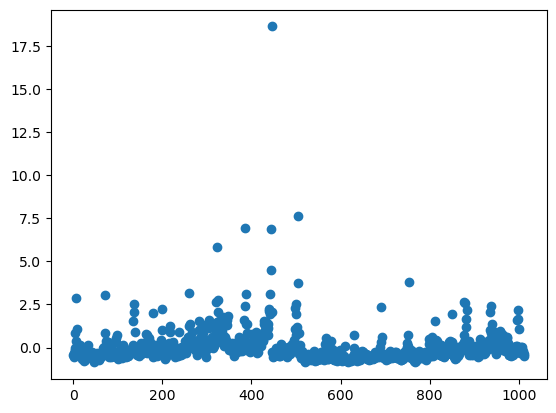

In [203]:
z = z[z[numerical_columns].apply(lambda x: x.between(-3, 3)).any(axis=1)]
plt.scatter(x=z.index, y=z['Netflix_Vol.'])

In [7]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

Date  Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  \
Date                                                                          
2024-02-02 2024-02-02              2.079               NaN            72.28   
2024-02-01 2024-02-01              2.050          161340.0            73.82   
2024-01-31 2024-01-31              2.100          142860.0            75.85   
2024-01-30 2024-01-30              2.077          139750.0            77.82   
2024-01-29 2024-01-29              2.490            3590.0            76.78   

            Crude_oil_Vol.  Copper_Price  Copper_Vol. Bitcoin_Price  \
Date                                                                  
2024-02-02             NaN        3.8215          NaN     43,194.70   
2024-02-01        577940.0        3.8535          NaN     43,081.40   
2024-01-31        344490.0        3.9060          NaN     42,580.50   
2024-01-30        347240.0        3.9110          NaN     42,946.20   
2024-01-29        331930.0        3.8790          NaN     43,299.80   

            Bitcoin_Vol. Platinum_Price  ...  Berkshire_Price Berkshire_Vol.  \
Date                                     ...                                   
2024-02-02       42650.0          901.6  ...         5,89,498        10580.0   
2024-02-01       47690.0          922.3  ...         5,81,600         9780.0   
2024-01-31       56480.0          932.6  ...         5,78,020         9720.0   
2024-01-30       55130.0          931.7  ...         5,84,680         9750.0   
2024-01-29       45230.0          938.3  ...         5,78,800        13850.0   

            Netflix_Price Netflix_Vol. Amazon_Price  Amazon_Vol.  Meta_Price  \
Date                                                                           
2024-02-02         564.64    4030000.0       171.81  117220000.0      474.99   
2024-02-01         567.51    3150000.0       159.28   66360000.0      394.78   
2024-01-31         564.11    4830000.0       155.20   49690000.0      390.14   
2024-01-30         562.85    6120000.0       159.00   42290000.0      400.06   
2024-01-29         575.79    6880000.0       161.26   42840000.0      401.02   

             Meta_Vol.  Gold_Price  Gold_Vol.  
Date                                           
2024-02-02  84710000.0    2,053.70        NaN  
2024-02-01  25140000.0    2,071.10   260920.0  
2024-01-31  20010000.0    2,067.40   238370.0  
2024-01-30  18610000.0    2,050.90   214590.0  
2024-01-29  17790000.0    2,034.90     1780.0  

[5 rows x 38 columns]

In [8]:
df_tweet['Date']=pd.to_datetime(df_tweet['Date']).dt.date
df_tweet.head()

Date                                              Tweet Stock Name  \
0  2022-09-29  Mainstream media has done an amazing job at br...       TSLA   
1  2022-09-29  Tesla delivery estimates are at around 364k fr...       TSLA   
2  2022-09-29  3/ Even if I include 63.0M unvested RSUs as of...       TSLA   
3  2022-09-29  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...       TSLA   
4  2022-09-29  @RealDanODowd @Tesla Stop trying to kill kids,...       TSLA   

  Company Name  
0  Tesla, Inc.  
1  Tesla, Inc.  
2  Tesla, Inc.  
3  Tesla, Inc.  
4  Tesla, Inc.

Text(0.5, 1.0, 'Histogram of Copper Price')

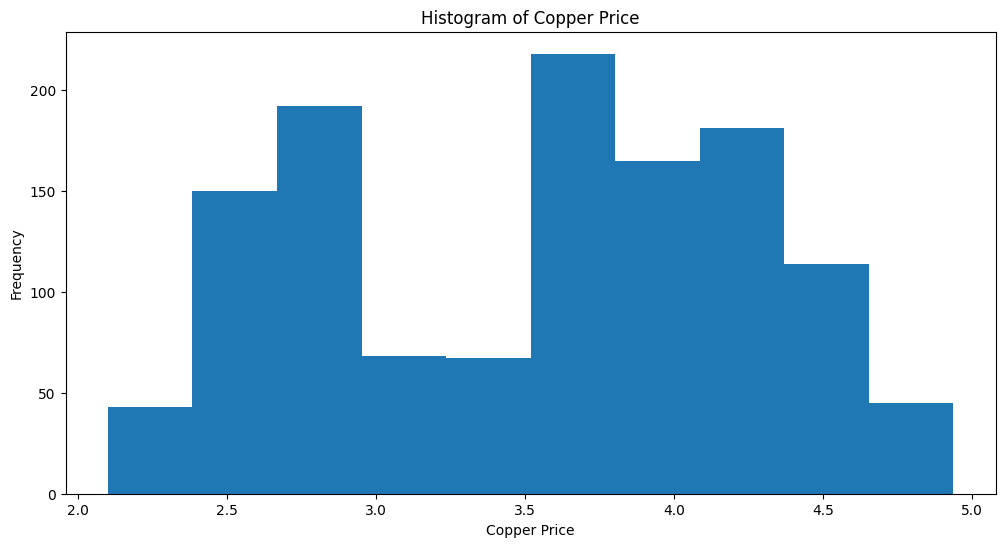

In [9]:
plt.figure(figsize=(12, 6))
plt.hist(df['Copper_Price'], bins=10)
plt.xlabel('Copper Price')
plt.ylabel('Frequency')
plt.title('Histogram of Copper Price')

### Missing Data

<Axes: ylabel='Date'>

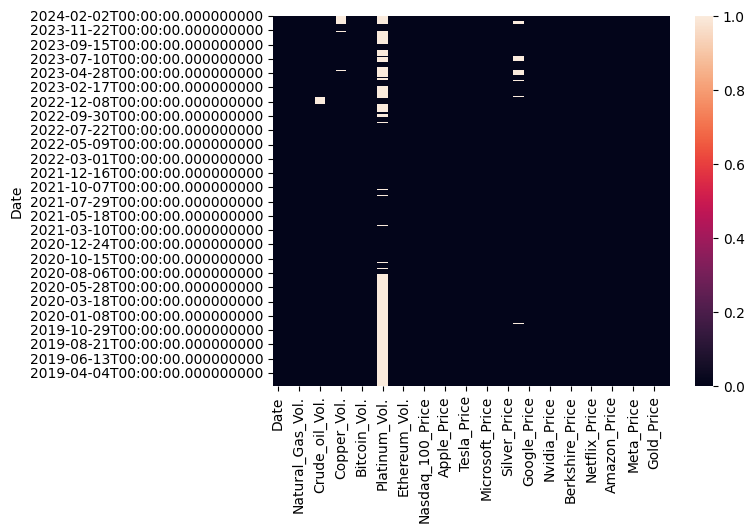

In [10]:
df_null= df.isna()
sns.heatmap(df_null)

In [11]:
df.drop(columns=['Date'], inplace=True)

In [12]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats

# Function to perform Little's MCAR test
def littles_test(data):
    # Dropping rows with no missing data to focus on rows with missing values
    data_complete = data.dropna()
    
    # Calculating chi-squared statistic for Little's test
    # The null hypothesis for Little's test: Data is missing completely at random (MCAR)
    n_obs = data.shape[0]
    chi_square_stat = 0
    
    for column in data.columns:
        observed_freqs = data_complete.groupby(column).size()
        expected_freqs = observed_freqs.mean()
        chi_square_stat += stats.chisquare(observed_freqs, f_exp=expected_freqs)[0]
    
    # Calculate the degrees of freedom
    df = len(data.columns) - 1
    
    # Calculate p-value from chi-squared distribution
    p_value = 1 - stats.chi2.cdf(chi_square_stat, df)
    
    return chi_square_stat, p_value

chi_square_stat, p_value = littles_test(df)

print(f"Chi-Squared Statistic: {chi_square_stat}")
print(f"P-Value: {p_value}")

if p_value > 0.05:
    print("Fail to reject the null hypothesis: Data is missing completely at random (MCAR)")
else:
    print("Reject the null hypothesis: Data is not missing completely at random")


Chi-Squared Statistic: 2170.302134646963
P-Value: 0.0
Reject the null hypothesis: Data is not missing completely at random


In [13]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols

Index(['Natural_Gas_Price', 'Natural_Gas_Vol.', 'Crude_oil_Price',
       'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.', 'Bitcoin_Vol.',
       'Platinum_Vol.', 'Ethereum_Vol.', 'Nasdaq_100_Vol.', 'Apple_Price',
       'Apple_Vol.', 'Tesla_Price', 'Tesla_Vol.', 'Microsoft_Price',
       'Microsoft_Vol.', 'Silver_Price', 'Silver_Vol.', 'Google_Price',
       'Google_Vol.', 'Nvidia_Price', 'Nvidia_Vol.', 'Berkshire_Vol.',
       'Netflix_Price', 'Netflix_Vol.', 'Amazon_Price', 'Amazon_Vol.',
       'Meta_Price', 'Meta_Vol.', 'Gold_Vol.'],
      dtype='object')

Original data:
            Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  \
Date                                                               
2024-02-02              2.079               NaN            72.28   
2024-02-01              2.050          161340.0            73.82   
2024-01-31              2.100          142860.0            75.85   
2024-01-30              2.077          139750.0            77.82   
2024-01-29              2.490            3590.0            76.78   

            Crude_oil_Vol.  Copper_Price  Copper_Vol. Bitcoin_Price  \
Date                                                                  
2024-02-02             NaN        3.8215          NaN     43,194.70   
2024-02-01        577940.0        3.8535          NaN     43,081.40   
2024-01-31        344490.0        3.9060          NaN     42,580.50   
2024-01-30        347240.0        3.9110          NaN     42,946.20   
2024-01-29        331930.0        3.8790          NaN     43,299.80   

          

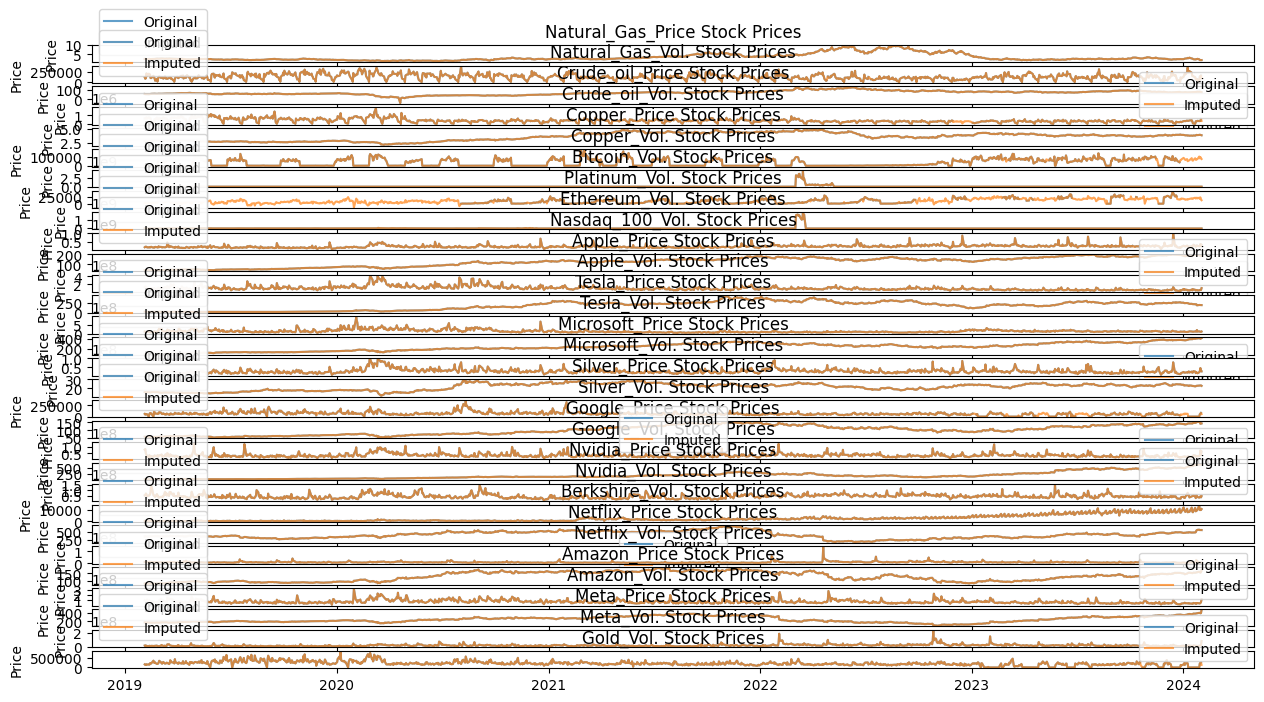

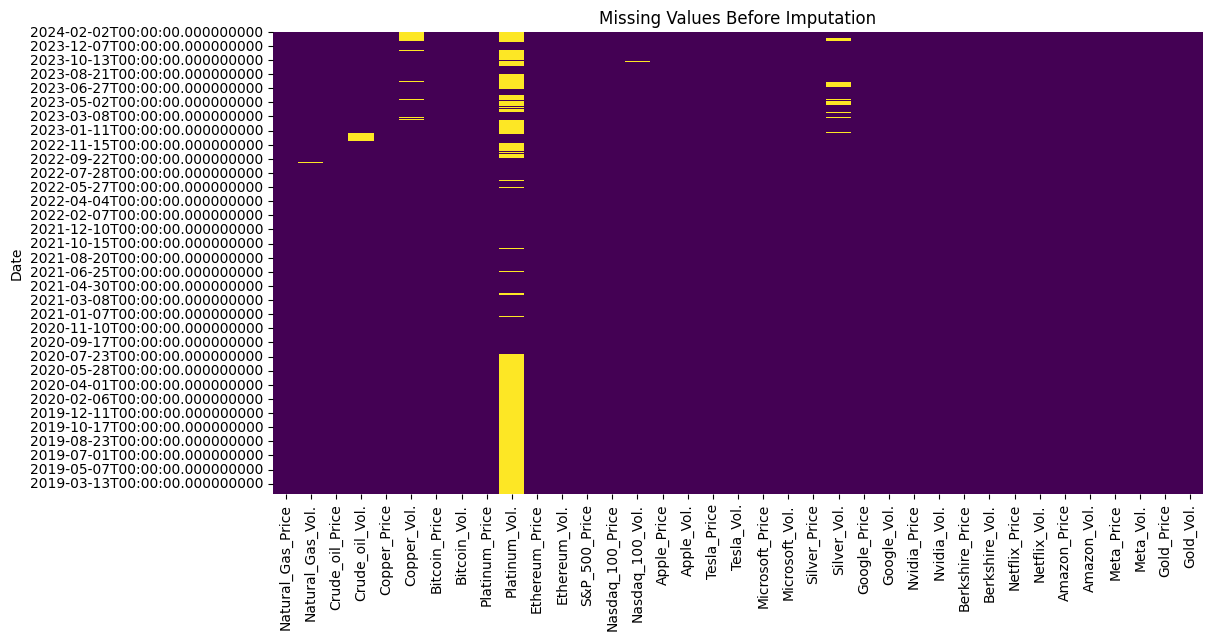

Average percentage difference for Natural_Gas_Price: nan%
Average percentage difference for Natural_Gas_Vol.: nan%
Average percentage difference for Crude_oil_Price: nan%
Average percentage difference for Crude_oil_Vol.: nan%
Average percentage difference for Copper_Price: nan%
Average percentage difference for Copper_Vol.: nan%
Average percentage difference for Bitcoin_Vol.: nan%
Average percentage difference for Platinum_Vol.: nan%
Average percentage difference for Ethereum_Vol.: nan%
Average percentage difference for Nasdaq_100_Vol.: nan%
Average percentage difference for Apple_Price: nan%
Average percentage difference for Apple_Vol.: nan%
Average percentage difference for Tesla_Price: nan%
Average percentage difference for Tesla_Vol.: nan%
Average percentage difference for Microsoft_Price: nan%
Average percentage difference for Microsoft_Vol.: nan%
Average percentage difference for Silver_Price: nan%
Average percentage difference for Silver_Vol.: nan%
Average percentage difference 

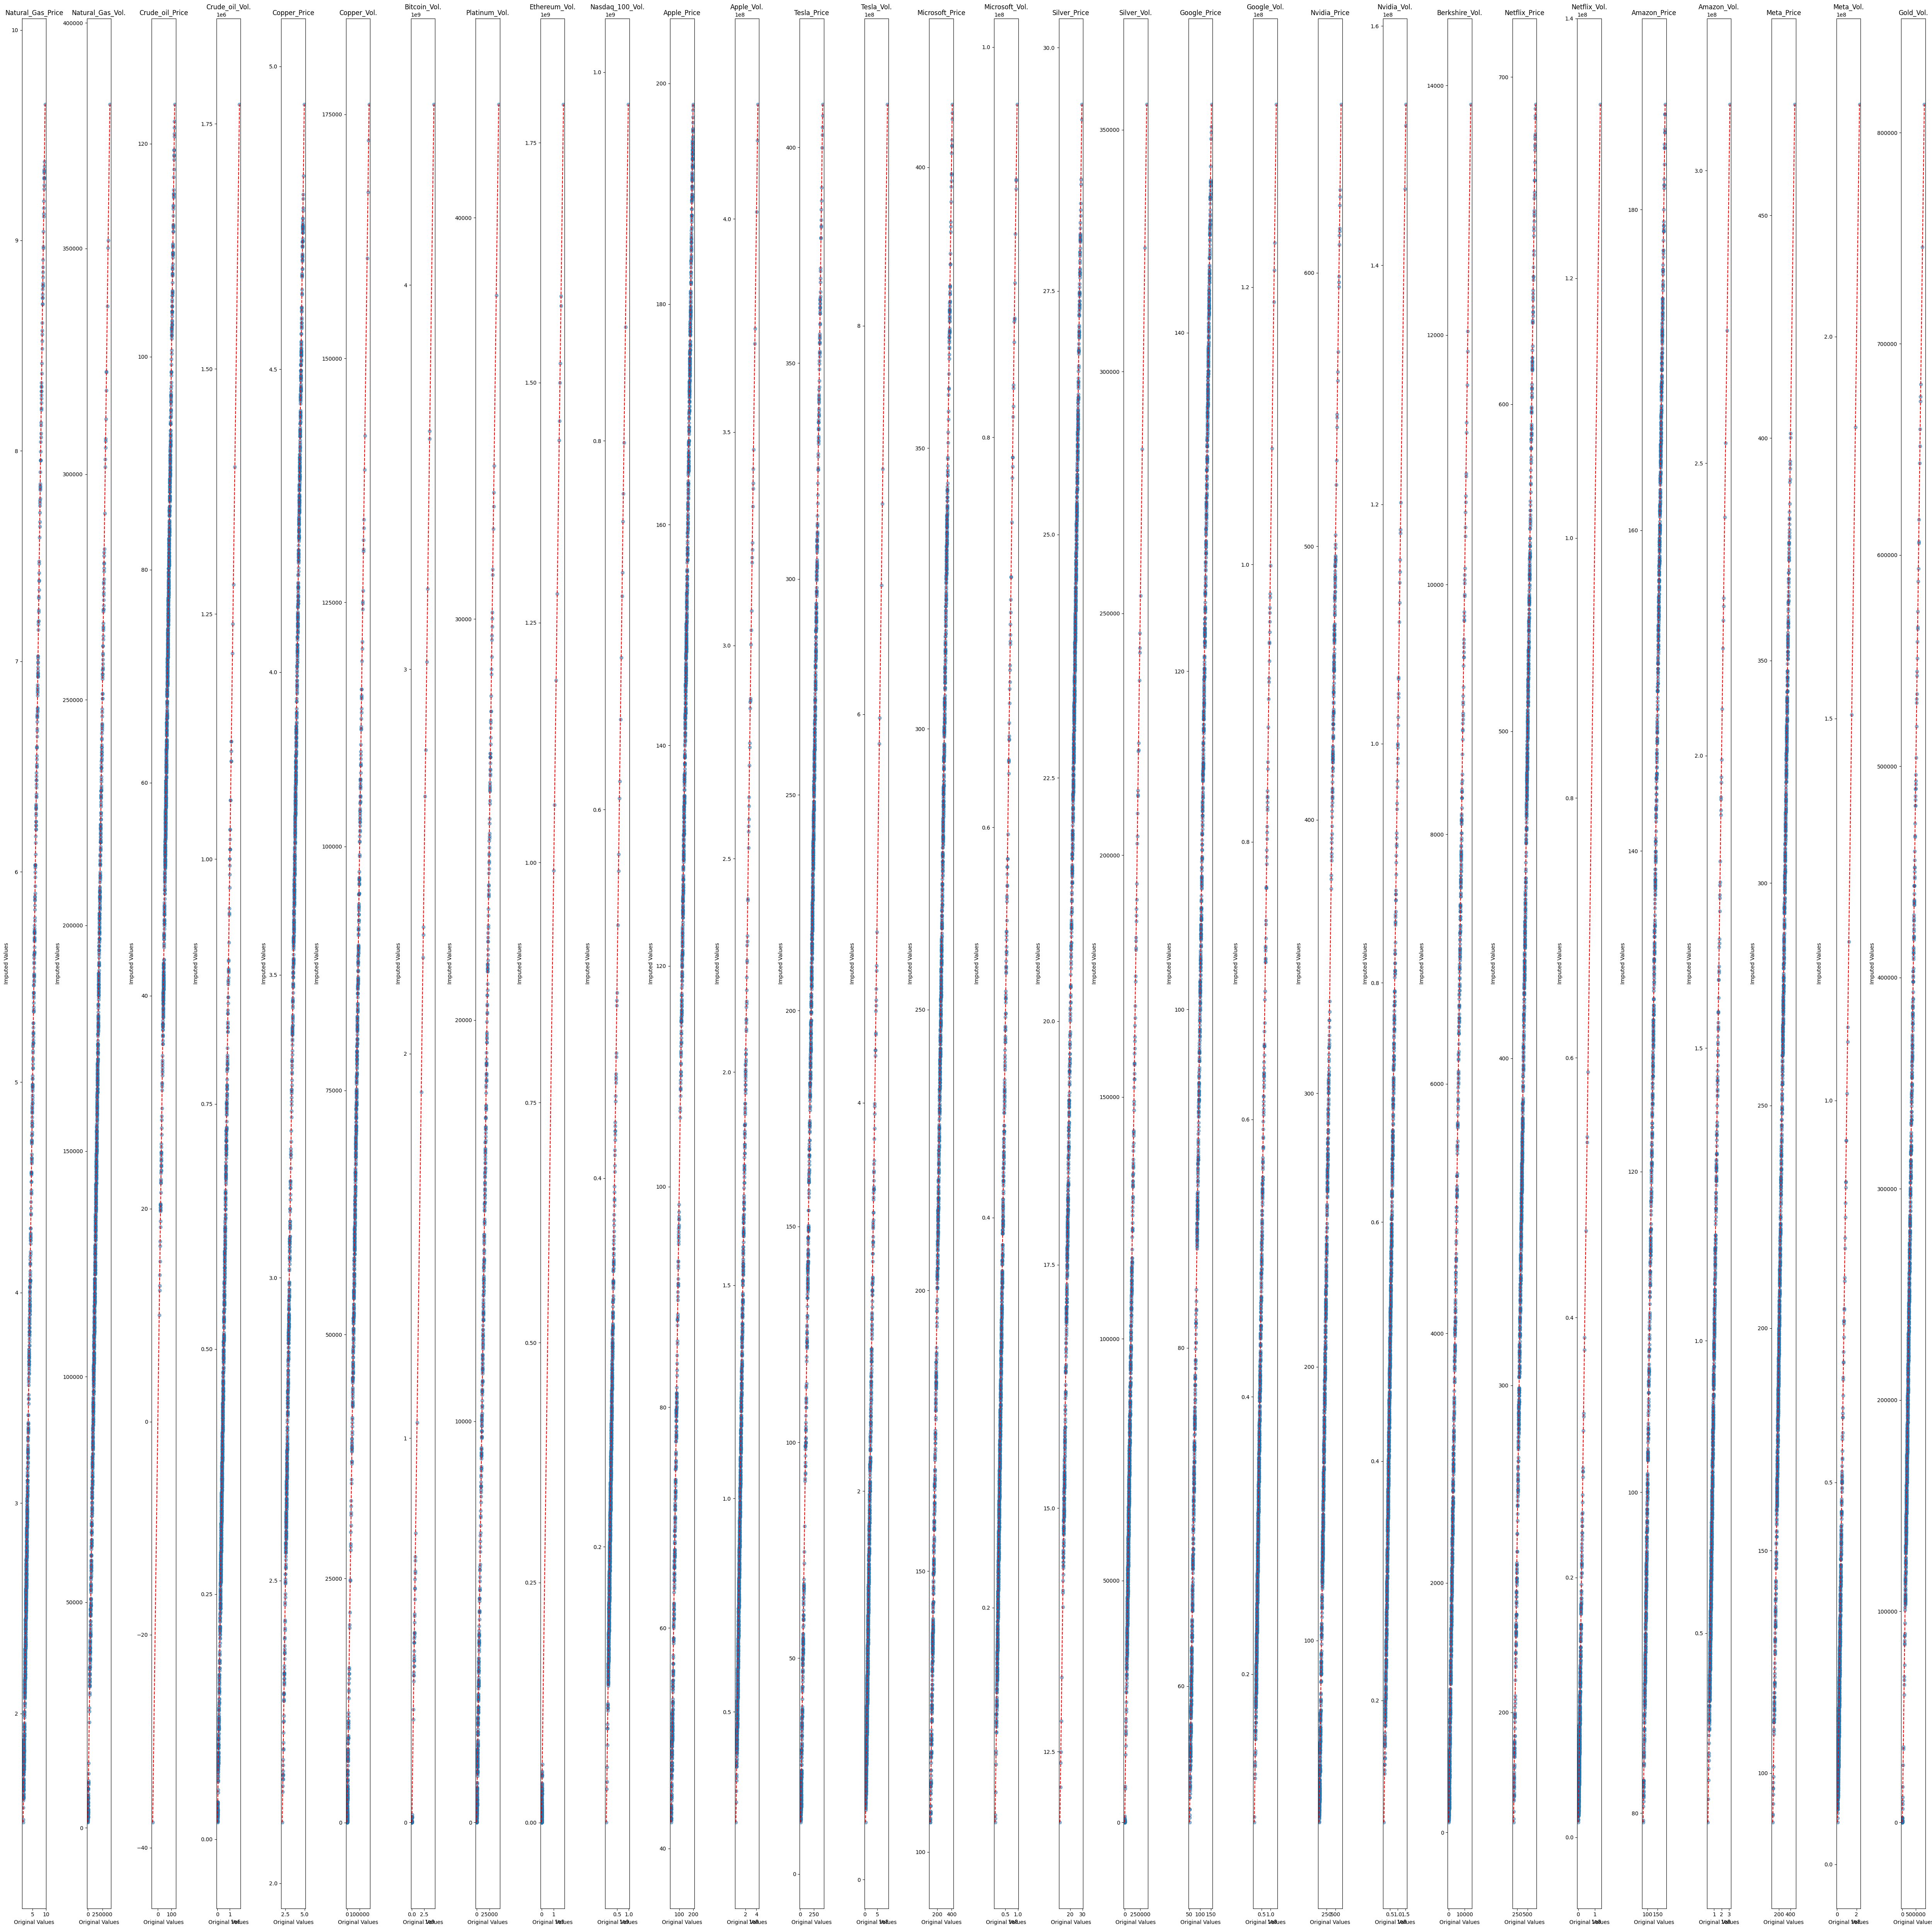

In [14]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
import matplotlib.pyplot as plt
import seaborn as sns

print("Original data:")
print(df.head())
print("\nMissing values:")
print(df.isnull().sum())

# Prepare data for imputation
df_numeric = df.reset_index(drop=True)  # Remove date index temporarily

# Initialize and fit MICE imputer
imputer = IterativeImputer(estimator=BayesianRidge(), n_nearest_features=None, 
                           imputation_order='ascending', random_state=42)
imputed_data = imputer.fit_transform(df[numerical_cols])

# Create a new DataFrame with imputed values
df_imputed = pd.DataFrame(imputed_data, columns=numerical_cols, index=df.index)

print("\nImputed data:")
print(df_imputed.head())
print("\nMissing values after imputation:")
print(df_imputed.isnull().sum())

# Visualization
plt.figure(figsize=(15, 10))
for i, company in enumerate(numerical_cols, 1):
    plt.subplot(len(df.columns), 1, i)
    plt.plot(df.index, df[company], label='Original', alpha=0.7)
    plt.plot(df.index, df_imputed[company], label='Imputed', alpha=0.7)
    plt.title(f'{company} Stock Prices')
    plt.ylabel('Price')
    plt.legend()

plt.tight_layout()
plt.show()

# Heatmap of missing values before imputation
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Before Imputation')
plt.show()

# Function to calculate percentage difference
def percentage_difference(original, imputed):
    mask = original.isnull()
    original_masked = original[~mask]
    imputed_masked = imputed[mask]
    diff = (imputed_masked - original_masked) / original_masked * 100
    return diff.mean()

# Calculate and print percentage difference for each company
for company in numerical_cols:
    diff = percentage_difference(df[company], df_imputed[company])
    print(f"Average percentage difference for {company}: {diff:.2f}%")

# Scatter plot to compare original vs imputed values
plt.figure(figsize=(50,50))
for i, company in enumerate(numerical_cols, 1):
    plt.subplot(1, len(numerical_cols), i)
    plt.scatter(df[company], df_imputed[company], alpha=0.5)
    plt.plot([df[company].min(), df[company].max()], [df[company].min(), df[company].max()], 'r--')
    plt.xlabel('Original Values')
    plt.ylabel('Imputed Values')
    plt.title(f'{company}')

plt.tight_layout()
plt.show()

In [15]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(numerical_cols)

Index(['Natural_Gas_Price', 'Natural_Gas_Vol.', 'Crude_oil_Price',
       'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.', 'Bitcoin_Vol.',
       'Platinum_Vol.', 'Ethereum_Vol.', 'Nasdaq_100_Vol.', 'Apple_Price',
       'Apple_Vol.', 'Tesla_Price', 'Tesla_Vol.', 'Microsoft_Price',
       'Microsoft_Vol.', 'Silver_Price', 'Silver_Vol.', 'Google_Price',
       'Google_Vol.', 'Nvidia_Price', 'Nvidia_Vol.', 'Berkshire_Vol.',
       'Netflix_Price', 'Netflix_Vol.', 'Amazon_Price', 'Amazon_Vol.',
       'Meta_Price', 'Meta_Vol.', 'Gold_Vol.'],
      dtype='object')


In [16]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
object= StandardScaler()
 
# Splitting the independent and dependent variables
i_data = df[numerical_cols]
 
# standardization 
scale = object.fit_transform(i_data) 
print(scale)

[[-0.77709343         nan  0.22989076 ...  3.314161    3.95221869
          nan]
 [-0.79301169  0.46171962  0.30516963 ...  2.18423349  0.12100689
   0.4331274 ]
 [-0.76556641  0.17458097  0.40440088 ...  2.11886928 -0.20892624
   0.23697223]
 ...
 [-0.45708152 -0.51731749 -0.66319045 ... -0.97536556 -0.64176249
  -0.64263803]
 [-0.45708152 -0.7671654  -0.68029928 ... -0.96592719 -0.04492439
  -0.71431513]
 [-0.45817933 -0.23515095 -0.63630514 ... -0.99283358 -0.20699681
  -0.44857053]]


In [17]:
import numpy as np
numerical_cols= df[df.select_dtypes(include='float').columns]
mean = numerical_cols.mean()
std= np.std(numerical_cols, axis=0)
z= (mean-numerical_cols)/std

                   Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  \
Natural_Gas_Price           1.000000         -0.208991         0.716886   
Natural_Gas_Vol.           -0.208991          1.000000        -0.237081   
Crude_oil_Price             0.716886         -0.237081         1.000000   
Crude_oil_Vol.             -0.247646          0.155983        -0.285883   
Copper_Price                0.464759         -0.228252         0.708823   
Copper_Vol.                -0.281545         -0.022949        -0.011311   
Bitcoin_Vol.                0.141344         -0.046180         0.257041   
Platinum_Vol.              -0.171531         -0.036139         0.096158   
Ethereum_Vol.               0.039430         -0.033422         0.145125   
Nasdaq_100_Vol.             0.127726         -0.089422         0.180922   
Apple_Price                 0.400177         -0.181892         0.628519   
Apple_Vol.                 -0.232286          0.178738        -0.505849   
Tesla_Price              

<Axes: >

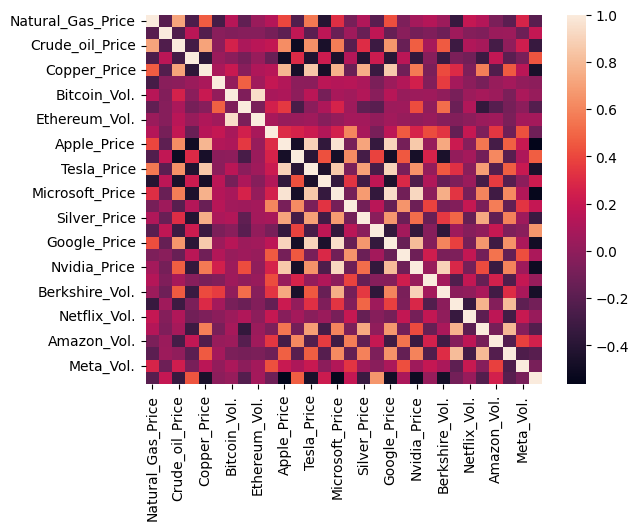

In [18]:
correlation= numerical_cols.corr()
print(correlation)
#print(correlation.sort_values(by=ascending=False))
sns.heatmap(correlation)

In [19]:
z.columns


Index(['Natural_Gas_Price', 'Natural_Gas_Vol.', 'Crude_oil_Price',
       'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.', 'Bitcoin_Vol.',
       'Platinum_Vol.', 'Ethereum_Vol.', 'Nasdaq_100_Vol.', 'Apple_Price',
       'Apple_Vol.', 'Tesla_Price', 'Tesla_Vol.', 'Microsoft_Price',
       'Microsoft_Vol.', 'Silver_Price', 'Silver_Vol.', 'Google_Price',
       'Google_Vol.', 'Nvidia_Price', 'Nvidia_Vol.', 'Berkshire_Vol.',
       'Netflix_Price', 'Netflix_Vol.', 'Amazon_Price', 'Amazon_Vol.',
       'Meta_Price', 'Meta_Vol.', 'Gold_Vol.'],
      dtype='object')

#### good correlation : 
* natural gas and crude oil
* natural gas and tesla
* crude oil and copper, tesla, google
* nasdaq is not particularly correlated to any stock
* apple with copper price, crude oil price, tesla , microsoft price, google and nvidea
* tesla with google, apple
* nvidea with apple, microsoft, meta and google 

In [20]:
df_tweet['Company Name'].value_counts()


Company Name
Tesla, Inc.                                           37422
Taiwan Semiconductor Manufacturing Company Limited    11034
Apple Inc.                                             5056
Procter & Gamble Company                               4089
Amazon.com, Inc.                                       4089
Microsoft Corporation                                  4089
NIO Inc.                                               3021
Meta Platforms, Inc.                                   2751
Advanced Micro Devices, Inc.                           2227
Netflix, Inc.                                          1727
Alphabet Inc.                                          1291
PayPal Holdings, Inc.                                   843
The Walt Disney Company                                 635
The Boeing Company                                      399
Costco Wholesale Corporation                            393
Intel Corporation                                       315
The Coca-Cola Company      

### integrating 2 datasets

In [21]:
df_tweet_removed=df_tweet[df_tweet['Company Name'].isin(['Apple Inc.','Microsoft Corporation','Tesla, Inc.','Alphabet Inc.'])]
df_tweet_removed

Date                                              Tweet  \
0      2022-09-29  Mainstream media has done an amazing job at br...   
1      2022-09-29  Tesla delivery estimates are at around 364k fr...   
2      2022-09-29  3/ Even if I include 63.0M unvested RSUs as of...   
3      2022-09-29  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...   
4      2022-09-29  @RealDanODowd @Tesla Stop trying to kill kids,...   
...           ...                                                ...   
61009  2021-09-30  All about this trendline now on $AAPL, continu...   
61010  2021-09-30  This thread is just a broad overview of the ba...   
61011  2021-09-30  In 2020, Tim Cook, CEO of $AAPL, earned $265,0...   
61012  2021-09-30  The media is really pushing hard for their big...   
61013  2021-09-30  I bought my first $AAPL stock in 2010. \n\nSin...   

      Stock Name Company Name  
0           TSLA  Tesla, Inc.  
1           TSLA  Tesla, Inc.  
2           TSLA  Tesla, Inc.  
3           TSLA  Tesla, Inc.  
4           TSLA  Tesla, Inc.  
...          ...          ...  
61009       AAPL   Apple Inc.  
61010       AAPL   Apple Inc.  
61011       AAPL   Apple Inc.  
61012       AAPL   Apple Inc.  
61013       AAPL   Apple Inc.  

[47858 rows x 4 columns]

In [22]:
companies_mapping={'Apple_Price':'Apple Inc.','Microsoft_Price':'Microsoft Corporation','Google_Price':'Alphabet Inc.','Tesla_Price':'Tesla, Inc.'}

In [23]:
# Step 1: Reset the index of df1 to make the 'Date' column from the index
df1_reset = df.reset_index()

# Step 2: Map the company names in df1 using the dictionary (if needed)
df1_reset.rename(columns=companies_mapping, inplace=True)

# Step 3: Melt df1 after mapping
df1_melted = df1_reset.melt(id_vars='Date', var_name='companies', value_name='values')


# Step 5: Clean 'Date' columns in both datasets (convert to str and ensure consistent format)
df1_melted['Date'] = pd.to_datetime(df1_melted['Date']).dt.strftime('%Y-%m-%d')
df_tweet_removed['Date'] = pd.to_datetime(df_tweet_removed['Date']).dt.strftime('%Y-%m-%d')

# Step 6: Remove leading/trailing whitespaces and make company names lowercase for consistency
df1_melted['companies'] = df1_melted['companies'].str.strip().str.lower()
df_tweet_removed['Company Name'] = df_tweet_removed['Company Name'].str.strip().str.lower()

# Step 7: Merge df1_melted with df2 on both 'Company name' and 'Date'
df_combined = pd.merge(df_tweet_removed, df1_melted, left_on=['Company Name', 'Date'], right_on=['companies', 'Date'], how='inner')



In [24]:
df_combined.head()

Date                                              Tweet Stock Name  \
0  2022-09-29  Mainstream media has done an amazing job at br...       TSLA   
1  2022-09-29  Tesla delivery estimates are at around 364k fr...       TSLA   
2  2022-09-29  3/ Even if I include 63.0M unvested RSUs as of...       TSLA   
3  2022-09-29  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...       TSLA   
4  2022-09-29  @RealDanODowd @Tesla Stop trying to kill kids,...       TSLA   

  Company Name    companies  values  
0  tesla, inc.  tesla, inc.  268.21  
1  tesla, inc.  tesla, inc.  268.21  
2  tesla, inc.  tesla, inc.  268.21  
3  tesla, inc.  tesla, inc.  268.21  
4  tesla, inc.  tesla, inc.  268.21

In [25]:
df_combined["sent_score"] = ''
df_combined["pos"] = ''
df_combined["neu"] = ''
df_combined["neg"] = ''

In [26]:
sent_analyze = SentimentIntensityAnalyzer()
for ind,row in df_combined.T.items():
    sent_sent = sent_analyze.polarity_scores(df_combined.loc[ind,'Tweet'])
    df_combined.at[ind,"sent_score"] = sent_sent["compound"]
    df_combined.at[ind,"pos"] = sent_sent["pos"]
    df_combined.at[ind,"neu"] = sent_sent["neu"]
    df_combined.at[ind,"neg"] = sent_sent["neg"]

In [27]:
df_combined.head(30)

Date                                              Tweet Stock Name  \
0   2022-09-29  Mainstream media has done an amazing job at br...       TSLA   
1   2022-09-29  Tesla delivery estimates are at around 364k fr...       TSLA   
2   2022-09-29  3/ Even if I include 63.0M unvested RSUs as of...       TSLA   
3   2022-09-29  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...       TSLA   
4   2022-09-29  @RealDanODowd @Tesla Stop trying to kill kids,...       TSLA   
5   2022-09-29  @RealDanODowd @Tesla This is you https://t.co/...       TSLA   
6   2022-09-29  For years @WholeMarsBlog viciously silenced @T...       TSLA   
7   2022-09-29  $NIO just because I'm down money doesn't mean ...       TSLA   
8   2022-09-29  50 likes for some $SPY $TSLA charts to study!\...       TSLA   
9   2022-09-29  @MrJames__321 @KellyRoofing @TeslaSolar @elonm...       TSLA   
10  2022-09-29  Tomorrow, Tesla, $TSLA, AI day 2 is ongoing.\n...       TSLA   
11  2022-09-29             Powerwall FTW! https://t.co/GWAaXXCrYv       TSLA   
12  2022-09-29  $TSLAQ: Tesla’s dead in Europe! Everyone else ...       TSLA   
13  2022-09-29  The irony is so thick you can cut it with a kn...       TSLA   
14  2022-09-29  Tesla AI day in 24 hours. Are you ready? $TSLA...       TSLA   
15  2022-09-29  Picked up some $TSLA shares at $269 https://t....       TSLA   
16  2022-09-29  2/ Even if @elonmusk loses the $TWTR trial (wo...       TSLA   
17  2022-09-29  Everyone should keep a long term perspective. ...       TSLA   
18  2022-09-29  $TSLA Cybertruck can act as a boat according t...       TSLA   
19  2022-09-29  #GigaBerlinBrandenburg\n@tesla destination cha...       TSLA   
20  2022-09-29  According to California rules that are now als...       TSLA   
21  2022-09-29  “New York state plans to adopt California's ru...       TSLA   
22  2022-09-29  @KellyRoofing @TeslaSolar @elonmusk @Tesla But...       TSLA   
23  2022-09-29  Tomorrow, Tesla, $TSLA, AI day 2 is ongoing.\n...       TSLA   
24  2022-09-29  Time for me to wrap up things for next 10 days...       TSLA   
25  2022-09-29  Today they're shooting the generals.\n$AAPL $T...       TSLA   
26  2022-09-29  I think i’ll buy some $TSLA today before the c...       TSLA   
27  2022-09-29  Fuck what you heard, it’s Tesla AI day (part 2...       TSLA   
28  2022-09-29  This makes my day! #Tesla #hawaii $TSLA https:...       TSLA   
29  2022-09-29  Even after being down 7% today the PE is 103x....       TSLA   

   Company Name    companies  values sent_score    pos    neu    neg  
0   tesla, inc.  tesla, inc.  268.21     0.0772  0.115  0.758  0.127  
1   tesla, inc.  tesla, inc.  268.21        0.0    0.0    1.0    0.0  
2   tesla, inc.  tesla, inc.  268.21      0.296  0.049  0.951    0.0  
3   tesla, inc.  tesla, inc.  268.21    -0.7568  0.137   0.59  0.273  
4   tesla, inc.  tesla, inc.  268.21     -0.875    0.0  0.474  0.526  
5   tesla, inc.  tesla, inc.  268.21        0.0    0.0    1.0    0.0  
6   tesla, inc.  tesla, inc.  268.21    -0.9359  0.045  0.626  0.329  
7   tesla, inc.  tesla, inc.  268.21       0.25  0.158  0.684  0.158  
8   tesla, inc.  tesla, inc.  268.21     0.4753  0.256  0.744    0.0  
9   tesla, inc.  tesla, inc.  268.21    -0.8625    0.0  0.728  0.272  
10  tesla, inc.  tesla, inc.  268.21      0.296  0.064  0.936    0.0  
11  tesla, inc.  tesla, inc.  268.21     0.6155  0.668  0.332    0.0  
12  tesla, inc.  tesla, inc.  268.21    -0.7332    0.0  0.868  0.132  
13  tesla, inc.  tesla, inc.  268.21    -0.3182    0.0  0.769  0.231  
14  tesla, inc.  tesla, inc.  268.21     0.3612  0.161  0.839    0.0  
15  tesla, inc.  tesla, inc.  268.21      0.296  0.239  0.761    0.0  
16  tesla, inc.  tesla, inc.  268.21    -0.4588  0.034  0.875  0.091  
17  tesla, inc.  tesla, inc.  268.21     0.0258  0.082  0.857  0.061  
18  tesla, inc.  tesla, inc.  268.21        0.0    0.0    1.0    0.0  
19  tesla, inc.  tesla, inc.  268.21     0.3612  0.128  0.872    0.0  
20  tesla, inc.  tesla, inc.  268.21  

In [28]:
df_combined['companies'].value_counts()

companies
tesla, inc.              29414
apple inc.                4059
microsoft corporation     3286
alphabet inc.             1040
Name: count, dtype: int64

In [ ]:
e

In [29]:
import pandas as pd
import numpy as np
from datetime import timedelta

# Create a sample dataset
date_range = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
df = pd.DataFrame({'Date': date_range, 'Value': np.random.randn(len(date_range))})

# Introduce some missing dates
df = df.drop(df.index[10:20])
df = df.drop(df.index[50:60])

# Set Date as index
df.set_index('Date', inplace=True)

# 1. Forward Fill
df_ffill = df.resample('D').ffill()

# 2. Backward Fill
df_bfill = df.resample('D').bfill()

# 3. Interpolation
df_interp = df.resample('D').interpolate()

# 4. Time-based averaging (e.g., weekly average)
df_time_avg = df.resample('D').fillna(df.groupby(df.index.isocalendar().week).transform('mean'))

# 5. Adding synthetic data
def add_synthetic_data(df):
    full_date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
d
    # Find missing dates
    missing_dates = df_full[df_full['Value'].isna()].index
    
    for date in missing_dates:
        # Generate a synthetic value (here we're using a simple random value)
        synthetic_value = np.random.randn()
        df_full.loc[date, 'Value'] = synthetic_value
    
    return df_full

df_synthetic = add_synthetic_data(df)

# Print sample results
print("Original Data:")
print(df.head(15))
print("\nForward Fill:")
print(df_ffill.head(15))
print("\nInterpolation:")
print(df_interp.head(15))
print("\nSynthetic Data:")
print(df_synthetic.head(15))

IndentationError: unexpected indent (738170040.py, line 33)

In [ ]:

# Assuming 'df' contains both 'Date' and numerical columns
numerical_cols = df_combined.select_dtypes(include='number') 

# Calculate z-scores for numerical columns
mean = numerical_cols.mean()
std = np.std(numerical_cols, axis=0)
z = (numerical_cols - mean) / std

# Add the 'Date' column back to the z DataFrame


# Create the KDE plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# KDE plot for Copper_Price
sns.kdeplot(data=df_combined, x=df_combined['Date'],y=df_combined['pos'], ax=axes[0, 0])
axes[0, 0].set_title('KDE Plot of crude oil Price')

# KDE plot for Copper_Vol.
# sns.kdeplot(data=df_combined, x=df_combined['neg'],y=df_combined['Date'],ax=axes[0, 1])
axes[0, 1].set_title('KDE Plot of crude oil Volume')

# sns.kdeplot(data=df_combined, x=df_combined['neu'], ax=axes[0, 1])

In [ ]:
df_combined['Company Name'].value_counts()

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
df_combined.drop(columns=['companies'],inplace=True)

In [ ]:
plt.figure(figsize=(12,5)) # set the size of the figure.

plt.subplot(1,2,1)
sns.histplot(df_combined[df_combined['Company Name']=='tesla, inc.']['values'], color='blue', label='tesla', kde=True) # the glucose levels for the non-diabetic patients are plotted in a historic bar chart.
sns.histplot(df_combined[df_combined['Company Name']=='apple inc.']['values'], color='red', label='Apple', kde=True) # the glucose levels for the diabetic patients are plotted in a historic bar chart.
plt.title('Glucose Distribution')
plt.legend()

In [ ]:
X = df_combined.drop('Company Name', axis=1) 
y = df_combined['Company Name']

# display original class distribution
print("\nOriginal class distribution:")
print(y.value_counts())

# apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
import plotly.graph_objects as go

for i in ['Apple_Price','Microsoft_Price','Google_Price','Tesla_Price']:
    fig = go.Figure([go.Scatter(x=pd.to_datetime(df['Date']), y=df[i])], label=i)
    fig.show()



In [ ]:
s
d
s